### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab

### Global

In [2]:
np.random.seed = 12345
BOLD = '\033[1m'
BOLDEND = '\033[0m'
datasets_path = "../Datasets/"

### Variables

In [3]:
# Storing data in dataframes, and dropping a random column with unknown values in it, plus renaming the columns
df_train = pd.read_csv(datasets_path + 
                       "Dataset_1_train.csv", 
                       header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})
df_test = pd.read_csv(datasets_path + 
                      "Dataset_1_test.csv", 
                      header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})
df_val = pd.read_csv(datasets_path + 
                     "Dataset_1_valid.csv", 
                     header = None).drop(labels=2, axis=1).rename(index=str, columns={0: "x", 1: "y"})

# Part 1

### Fit Polynomial (1.a)

In [4]:
def polyfit(x, y, order, lambda_ = None):
    order += 1
    x = np.array(x)
    y = np.array([y]).T
    A = np.vander(x, order)
    if lambda_:
        d = np.diag(np.full(order, lambda_))        
        c = np.dot(np.linalg.inv(np.add(np.dot(A.T, A), d)), np.dot(A.T, y))
    else:
        c = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))

    return c.reshape([order])

In [11]:
# Getting coefficients and getting the function
poly_coefficients = polyfit(df_train.x, df_train.y, 20)
poly_fn = np.poly1d(poly_coefficients)

In [12]:
# Function to calculate MSE on a dataset
def get_mean_squared_error(data, fct):
    sum_ = 0
    for x, y in zip(data.x.values, data.y.values):
        sum_ += np.square(y - fct(x))
    return sum_/len(data.x.values)

In [13]:
print("Mean Squared Error on the %sTraning%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_train, poly_fn)), BOLDEND))
print("Mean Squared Error on the %sValidation%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_val, poly_fn)), BOLDEND))

Mean Squared Error on the Traning dataset is 6.48
Mean Squared Error on the Validation dataset is 1420.40


### Visualization (1.b)

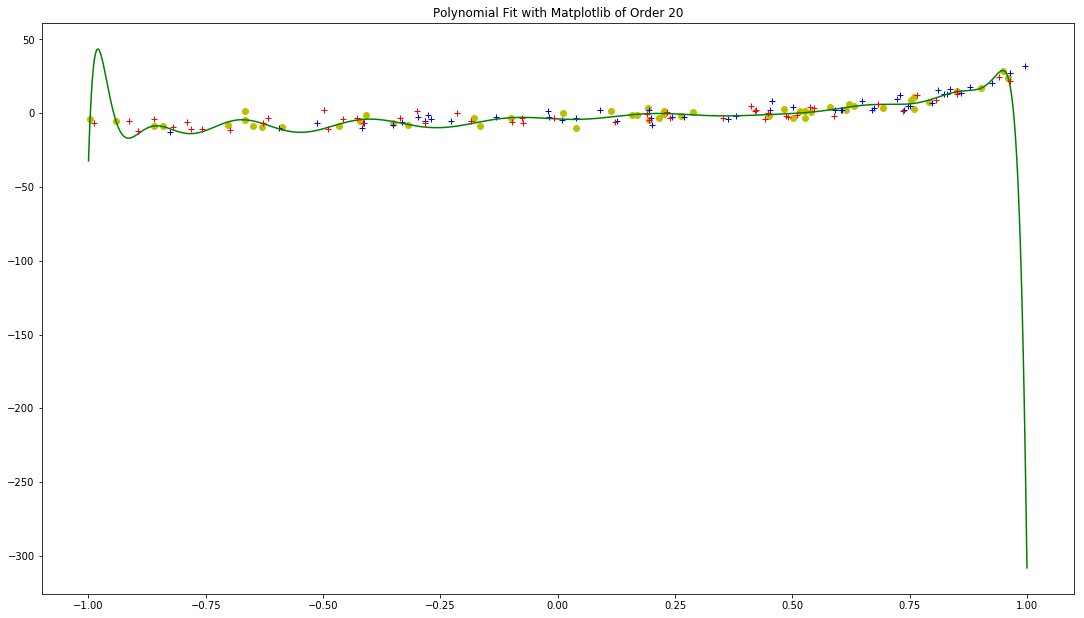

In [14]:
# Straight green line is the regression
# Yellow dots are training dataset
# Blue dots are validation dataset
# Red dots are testing dataset

def plot_fit(poly_fn, title = "Polynomial Fit with Matplotlib of Order 20"):
    x = df_train.x
    y = df_train.y
    fit_x = np.linspace(-1, 1, 1000)
    fit_y = poly_fn(fit_x)
    plt.plot(x,y,'yo', df_val.x, df_val.y, 'b+', fit_x, fit_y, 'g', df_test.x, df_test.y, 'r+')
    pylab.title(title)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
plot_fit(poly_fn)

### Analysis (1.c)

In [16]:
print("Mean Squared Error on the %sTesting%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_test, poly_fn)), BOLDEND))

Mean Squared Error on the Testing dataset is 50.50


The model is overfitting the traning dataset. 
1. The Mean Squared Error is much larger on the Testing dataset than on the Traning dataset. 
2. The MSE of the Validation dataset is off charts due to the overfitting (not enough observation in training dataset).
3. The graph shows the regression ondulate trying to overfit datapoints from the traning dataset.

# Part 2

### L2 regularization
See 1.a < function > polyfit to see the implementation of L2 regularization

In [76]:
lamb_vals = np.linspace(0, 1, 100)
mserrors_train = dict.fromkeys(lamb_vals)
mserrors_val = dict.fromkeys(lamb_vals)
for l in lamb_vals:
    poly_coefficients = polyfit(df_train.x, df_train.y, 20, l)
    poly_fn = np.poly1d(poly_coefficients)
    mserrors_train[l] = get_mean_squared_error(df_train, poly_fn)
    
    mserrors_val[l] = get_mean_squared_error(df_val, poly_fn)

### Plot MSE (2.a)

2
0.020202020202


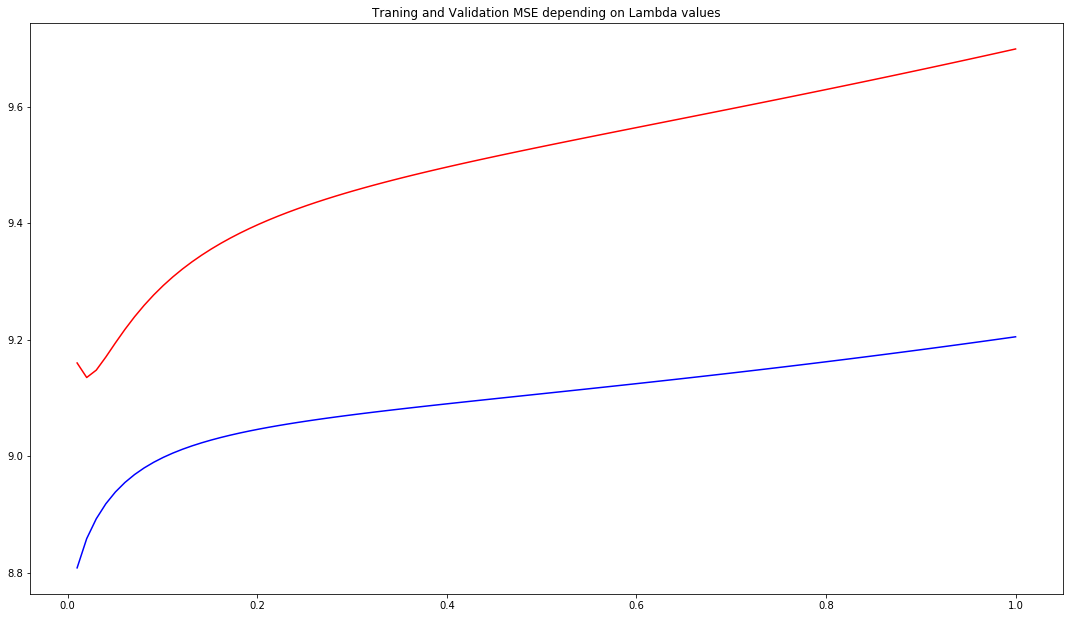

In [77]:
# Plot MSE
x_tr, y_tr = zip(*sorted(mserrors_train.items()))
x_val, y_val = zip(*sorted(mserrors_val.items()))

# skipping first value (when lambda is zero, because it is too large)
plt.plot(x_tr[1:], y_tr[1:], 'b', x_val[1:], y_val[1:], 'r')
pylab.title("Traning and Validation MSE depending on Lambda values")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Straight red  line is validation MSE
# Straight blue line is validation MSE
plt.show()

### Best Lambda (2.b)

In [87]:
print("The best value for %sLambda%s is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.5f}".format(x_val[np.argmin(y_val)]), BOLDEND))
print("Mean Squared Error on the %sTraning%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_train, poly_fn)), BOLDEND))
print("Mean Squared Error on the %sValidation%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_val, poly_fn)), BOLDEND))
print("Mean Squared Error on the %sTesting%s dataset is %s%s%s"
      % (BOLD, BOLDEND, BOLD, "{0:.2f}".format(get_mean_squared_error(df_test, poly_fn)), BOLDEND))

The best value for Lambda is 0.02020
Mean Squared Error on the Traning dataset is 9.21
Mean Squared Error on the Validation dataset is 9.70
Mean Squared Error on the Testing dataset is 10.34


### Plotting best regression (2.c)

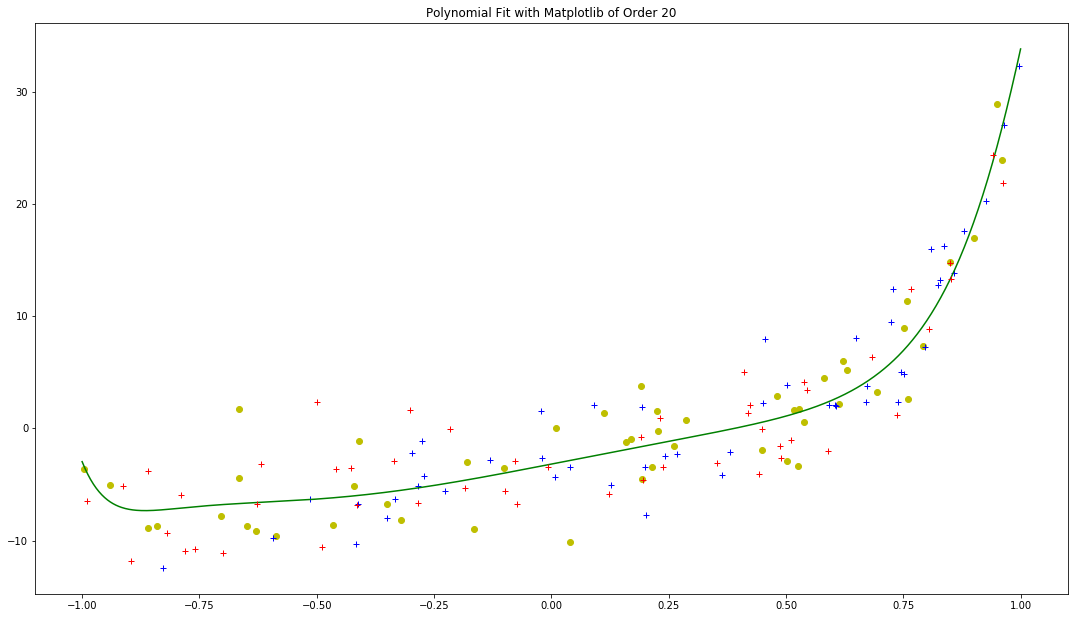

In [85]:
best_poly_coefficients = polyfit(df_train.x, df_train.y, 20, x_val[np.argmin(y_val)])
best_poly_fn = np.poly1d(best_poly_coefficients)

# Straight green line is the regression
# Yellow dots are training dataset
# Blue dots are validation dataset
# Red dots are testing dataset
plot_fit(best_poly_fn)

### Model Analysis (2.d)
The model is generalizing well the data. That being said, since the MSE is smaller for the training (9.21) set than the testing set (10.34), we could argue that the model is overfitting the training dataset.